# imports

In [1]:
import os 
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
import arcpy

In [3]:
from arcpy.sa import *
arcpy.CheckExtension('Spatial')

'Available'

In [4]:
from arcpy.ia import *
arcpy.CheckExtension('ImageAnalyst')

'Available'

In [ ]:
# This should print the project repository folder
os.chdir(os.path.dirname(os.getcwd()))
os.getcwd()

In [ ]:
arcpy.env.workspace = os.getcwd()
os.getcwd()

# Load test samples

Rename 

In [21]:
import random
tile_sizes = [256,512]
pixel_sizes = [10,25]

for ts in tile_sizes:
    for ps in pixel_sizes:
        # Path to training samples folder
        ts_folder = f'data/training_samples/ts_{ts}_{ps}/ts_svalbard'

        # List all the folders in the ts folder
        folders = [f for f in os.listdir(ts_folder) if os.path.isdir(os.path.join(ts_folder, f))]

        # Rename each folder 
        for int, folder in enumerate(folders, start=1):
            old_folder_path = os.path.join(ts_folder, folder)
            new_folder_name = f"sample_{int}"
            new_folder_path = os.path.join(ts_folder, new_folder_name)
            
            # Rename the folder
            try: 
                os.rename(old_folder_path, new_folder_path)
            except:
                print(f'error renaming at {new_folder_path}, probably already renamed')
                continue
            print(f"Renamed '{folder}' to '{new_folder_name}'")

Renamed 'sample_1' to 'sample_1'
error renaming at data/training_samples/ts_256_10/ts_svalbard\sample_2, probably already renamed
error renaming at data/training_samples/ts_256_10/ts_svalbard\sample_3, probably already renamed
error renaming at data/training_samples/ts_256_10/ts_svalbard\sample_4, probably already renamed
error renaming at data/training_samples/ts_256_10/ts_svalbard\sample_5, probably already renamed
error renaming at data/training_samples/ts_256_10/ts_svalbard\sample_6, probably already renamed
error renaming at data/training_samples/ts_256_10/ts_svalbard\sample_7, probably already renamed
error renaming at data/training_samples/ts_256_10/ts_svalbard\sample_8, probably already renamed
error renaming at data/training_samples/ts_256_10/ts_svalbard\sample_9, probably already renamed
error renaming at data/training_samples/ts_256_10/ts_svalbard\sample_10, probably already renamed
error renaming at data/training_samples/ts_256_10/ts_svalbard\sample_11, probably already ren

In [7]:
import random

# Make sure to use the same random seed as in the model training notebook (0)
random.seed(1)

# Generate a random list of the numbers between 1 and 158
indices = random.sample(range(1, 159), 158)

print(indices)


[35, 146, 17, 66, 31, 127, 116, 121, 98, 54, 25, 125, 8, 100, 111, 1, 115, 69, 59, 27, 82, 157, 6, 7, 3, 150, 56, 109, 137, 57, 113, 151, 64, 71, 30, 45, 124, 87, 29, 133, 140, 38, 134, 149, 108, 72, 83, 13, 24, 81, 93, 117, 16, 96, 43, 114, 92, 65, 55, 101, 86, 148, 39, 37, 76, 126, 99, 51, 94, 5, 62, 32, 52, 142, 23, 47, 147, 48, 12, 129, 155, 14, 21, 67, 91, 131, 63, 4, 61, 136, 40, 74, 22, 78, 122, 128, 143, 50, 144, 158, 132, 36, 15, 26, 33, 84, 95, 53, 103, 18, 104, 79, 105, 88, 97, 85, 9, 34, 112, 77, 28, 138, 154, 110, 60, 73, 139, 106, 153, 80, 46, 120, 123, 49, 44, 20, 75, 11, 58, 145, 130, 141, 156, 107, 2, 41, 42, 89, 19, 102, 70, 135, 10, 119, 68, 118, 90, 152]


In [ ]:
# test_split = []

# for i in indices[128:]:
#     test_split.append(f'data/training_samples/ts_256_25/ts_svalbard/sample_{i}') 

# print(len(test_split))
# print(test_split)

30
['data/training_samples/ts_256_25/ts_svalbard/sample_153', 'data/training_samples/ts_256_25/ts_svalbard/sample_80', 'data/training_samples/ts_256_25/ts_svalbard/sample_46', 'data/training_samples/ts_256_25/ts_svalbard/sample_120', 'data/training_samples/ts_256_25/ts_svalbard/sample_123', 'data/training_samples/ts_256_25/ts_svalbard/sample_49', 'data/training_samples/ts_256_25/ts_svalbard/sample_44', 'data/training_samples/ts_256_25/ts_svalbard/sample_20', 'data/training_samples/ts_256_25/ts_svalbard/sample_75', 'data/training_samples/ts_256_25/ts_svalbard/sample_11', 'data/training_samples/ts_256_25/ts_svalbard/sample_58', 'data/training_samples/ts_256_25/ts_svalbard/sample_145', 'data/training_samples/ts_256_25/ts_svalbard/sample_130', 'data/training_samples/ts_256_25/ts_svalbard/sample_141', 'data/training_samples/ts_256_25/ts_svalbard/sample_156', 'data/training_samples/ts_256_25/ts_svalbard/sample_107', 'data/training_samples/ts_256_25/ts_svalbard/sample_2', 'data/training_sampl

In [ ]:
# train_split = []

# for i in indices[:128]:
#     train_split.append(f'data/training_samples/ts_256_25/ts_svalbard/sample_{i}')

# print(len(train_split))
# print(train_split)

128
['data/training_samples/ts_256_25/ts_svalbard/sample_35', 'data/training_samples/ts_256_25/ts_svalbard/sample_146', 'data/training_samples/ts_256_25/ts_svalbard/sample_17', 'data/training_samples/ts_256_25/ts_svalbard/sample_66', 'data/training_samples/ts_256_25/ts_svalbard/sample_31', 'data/training_samples/ts_256_25/ts_svalbard/sample_127', 'data/training_samples/ts_256_25/ts_svalbard/sample_116', 'data/training_samples/ts_256_25/ts_svalbard/sample_121', 'data/training_samples/ts_256_25/ts_svalbard/sample_98', 'data/training_samples/ts_256_25/ts_svalbard/sample_54', 'data/training_samples/ts_256_25/ts_svalbard/sample_25', 'data/training_samples/ts_256_25/ts_svalbard/sample_125', 'data/training_samples/ts_256_25/ts_svalbard/sample_8', 'data/training_samples/ts_256_25/ts_svalbard/sample_100', 'data/training_samples/ts_256_25/ts_svalbard/sample_111', 'data/training_samples/ts_256_25/ts_svalbard/sample_1', 'data/training_samples/ts_256_25/ts_svalbard/sample_115', 'data/training_sampl

# Ground truth and raw backscatter mosaic from test samples

ground truth (labels) mosaic

In [8]:

arcpy.env.overwriteOutput = True
tile_sizes = [256,512] 
pixel_sizes = [10,25]

for tilesize in tile_sizes:
    for pixelsize in pixel_sizes:
        test_folder_path = f'data/pred/pred_{tilesize}_{pixelsize}'

        # test split list
        test_split = []
        for i in indices[128:]:
            test_split.append(f'data/training_samples/ts_{tilesize}_{pixelsize}/ts_svalbard/sample_{i}') 

        for img_folder_path in test_split:
            labels_path = img_folder_path + '/labels'
            img = img_folder_path.removeprefix(f'data/training_samples/ts_{tilesize}_{pixelsize}/ts_svalbard/')

            # empty list to store label rasters
            raster_list = []
            for file in os.listdir(labels_path):
                if file.endswith('.tif'):
                    tif_path = '/' + os.path.join(labels_path,file)
                    raster_list.append(tif_path)
            
            # create empty raster dataset
            out_folder = f'data/pred/pred_{tilesize}_{pixelsize}/{img}'
            if not os.path.isdir(out_folder):
                os.makedirs(out_folder)
            arcpy.management.CreateRasterDataset(
                out_path = out_folder,
                out_name = 'labels_mosaic.png',
                pixel_type = '8_BIT_UNSIGNED', # A binary raster
                cellsize = None,
                number_of_bands = 1,
                pyramids = 'NONE',
                compression = 'NONE',
            )
        
            print(f'created empty raster in {out_folder}')
            
            # mosaic label rasters in the new empty raster dataset
            arcpy.management.Mosaic(
                inputs = raster_list,
                target = f'data/pred/pred_{tilesize}_{pixelsize}/{img}/labels_mosaic.png',
                mosaic_type = 'MAXIMUM',# keep maximum because of padding
                colormap = 'FIRST',
                background_value = None,
                nodata_value = None,
                onebit_to_eightbit = 'NONE',
                mosaicking_tolerance = 0,
                MatchingMethod = 'NONE'
            )
            print(f'mosaicked {img} at {out_folder}/labels_mosaic.png')

created empty raster in data/pred/pred_256_10/sample_153
mosaicked sample_153 at data/pred/pred_256_10/sample_153/labels_mosaic.png
created empty raster in data/pred/pred_256_10/sample_80
mosaicked sample_80 at data/pred/pred_256_10/sample_80/labels_mosaic.png
created empty raster in data/pred/pred_256_10/sample_46
mosaicked sample_46 at data/pred/pred_256_10/sample_46/labels_mosaic.png
created empty raster in data/pred/pred_256_10/sample_120
mosaicked sample_120 at data/pred/pred_256_10/sample_120/labels_mosaic.png
created empty raster in data/pred/pred_256_10/sample_123
mosaicked sample_123 at data/pred/pred_256_10/sample_123/labels_mosaic.png
created empty raster in data/pred/pred_256_10/sample_49
mosaicked sample_49 at data/pred/pred_256_10/sample_49/labels_mosaic.png
created empty raster in data/pred/pred_256_10/sample_44
mosaicked sample_44 at data/pred/pred_256_10/sample_44/labels_mosaic.png
created empty raster in data/pred/pred_256_10/sample_20
mosaicked sample_20 at data/pred

raw backscatter mosaic

In [18]:
arcpy.env.overwriteOutput = True
tile_sizes = [256,512]
pixel_sizes = [10,25]

for tilesize in tile_sizes:
    for pixelsize in pixel_sizes:
        test_folder_path = f'data/pred/pred_{tilesize}_{pixelsize}'

        # test split list
        test_split = []
        for i in indices[128:]:
            test_split.append(f'data/training_samples/ts_{tilesize}_{pixelsize}/ts_svalbard/sample_{i}') 

        for img_folder_path in test_split:
            raw_images_path = img_folder_path + '/images'
            img = img_folder_path.removeprefix(f'data/training_samples/ts_{tilesize}_{pixelsize}/ts_svalbard/')

            # empty list to store raw rasters
            raster_list = []
            for file in os.listdir(raw_images_path):
                if file.endswith('.tif'):
                    tif_path = '/' + os.path.join(raw_images_path,file)
                    raster_list.append(tif_path)

            # create empty raster dataset for storing the raw mosaic
            out_folder = f'data/pred/pred_{tilesize}_{pixelsize}/{img}'
            if not os.path.isdir(out_folder):
                os.makedirs(out_folder)
            arcpy.management.CreateRasterDataset(
                out_path = out_folder,
                out_name = 'raw_mosaic.tif',
                pixel_type = '8_BIT_UNSIGNED', # 8bit raster to store the raw 0,255 values
                cellsize = None,
                number_of_bands = 1,
                pyramids = 'NONE',
                compression = 'NONE',
            )
            print(f'created empty raster in {out_folder}')

            out_path = f'{out_folder}/raw_mosaic.tif'

            # mosaic raw image rasters
            arcpy.management.Mosaic(
                inputs = raster_list,
                target = out_path,
                mosaic_type = 'MAXIMUM', # keep maximum because of padding
                colormap = 'FIRST',
                background_value = None,
                nodata_value = 0, # use the no data value from the training samples (here it is 0)
                onebit_to_eightbit = 'NONE',
                mosaicking_tolerance = 0,
                MatchingMethod = 'NONE'
            )
            print(f'mosaicked raw {img} at {out_path}')

created empty raster in data/pred/pred_256_10/sample_153
mosaicked raw sample_153 at data/pred/pred_256_10/sample_153/raw_mosaic.tif
created empty raster in data/pred/pred_256_10/sample_80
mosaicked raw sample_80 at data/pred/pred_256_10/sample_80/raw_mosaic.tif
created empty raster in data/pred/pred_256_10/sample_46
mosaicked raw sample_46 at data/pred/pred_256_10/sample_46/raw_mosaic.tif
created empty raster in data/pred/pred_256_10/sample_120
mosaicked raw sample_120 at data/pred/pred_256_10/sample_120/raw_mosaic.tif
created empty raster in data/pred/pred_256_10/sample_123
mosaicked raw sample_123 at data/pred/pred_256_10/sample_123/raw_mosaic.tif
created empty raster in data/pred/pred_256_10/sample_49
mosaicked raw sample_49 at data/pred/pred_256_10/sample_49/raw_mosaic.tif
created empty raster in data/pred/pred_256_10/sample_44
mosaicked raw sample_44 at data/pred/pred_256_10/sample_44/raw_mosaic.tif
created empty raster in data/pred/pred_256_10/sample_20
mosaicked raw sample_20 a

# Predict using semantic segmentation model

In [ ]:
tilesize = 256
pixelsize = 25

# define the esri model definition file path
emd_model_path = 'models/pretrained/deeplab_256_25_RESNET50/deeplab_256_25_RESNET50.emd'

pred_folder = 'data/pred/pred_256_25'

for img in os.listdir(pred_folder):
    input_path = f'{pred_folder}/{img}/raw_mosaic.tif'
    # run the model to classify the raw rasters
    classified_raster = ClassifyPixelsUsingDeepLearning(
        in_raster = input_path, 
        in_model_definition = emd_model_path,
        arguments = f'padding 4;batch_size 4;test_time_augmentation False;predict_background True;tile_size {tilesize}', 
        processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
        out_classified_folder=None,
        out_featureclass = None,
        overwrite_attachments = 'NO_OVERWRITE',
        use_pixelspace = 'NO_PIXELSPACE'
    )

    predicted_out_path = f'{pred_folder}/{img}/pred.tif'
    classified_raster.save(predicted_out_path)
    print(f'Predicted on {raw_images_path} at {predicted_out_path}')

# Compute accuracy assessment (Dice score)

Fix predicted raster to compute accuracy assessment

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred_folder = 'data/pred/pred_256_25'

# empty dictionary to store dice values per test sample
dice_scores = {}

# function to calculate the Dice score for slicks pixels (class 1)
def calculate_dice_score(cm, class_id=1):
    TP = cm[class_id, class_id]  # true positives 
    FP = cm[:, class_id].sum() - TP  # false positives 
    FN = cm[class_id, :].sum() - TP  # false negatives 

    # calculate dice and return
    dice_score = 2 * TP / (2 * TP + FP + FN)
    return dice_score

# For each image in the prediction folder
for img in os.listdir(pred_folder):
    img_path = pred_folder + f'/{img}'
    pred_path = img_path + '/pred.tif'
    label_path = img_path + '/true_mosaic.tif'

    # Open the TIFF files using Pillow
    pred = Image.open(pred_path)
    labels = Image.open(label_path)

    # convert to numpy arrays for faster calculation
    pred = np.array(pred).flatten()
    labels = np.array(labels).flatten()

    # shape check
    if pred.shape != labels.shape:
        raise ValueError(f"Rasters for image {img} have different shapes!")

    # compute confusion matrix with scikit-learn
    cm = confusion_matrix(pred, labels)

    # calculate dice with function
    dice_score = calculate_dice_score(cm, class_id=1)
    print(f"Dice Score for class 1 in image {img}: {dice_score:.4f}")

    # store the dice in the dictionary
    dice_scores[img] = dice_score

    # # scikit-learn display
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.show()

# Optionally, print the dictionary of Dice scores
print("Dice scores for all images:", dice_scores)
avg_dice = sum(dice_scores.values()) / len(dice_scores)
print(f'average dice score = {avg_dice} ')


Dice Score for class 1 in image image_129: 0.4616
Dice Score for class 1 in image image_130: 0.7037
Dice Score for class 1 in image image_131: 0.0010
Dice Score for class 1 in image image_132: 0.4586
Dice Score for class 1 in image image_133: 0.7981
Dice Score for class 1 in image image_134: 0.5252
Dice Score for class 1 in image image_135: 0.6292
Dice Score for class 1 in image image_136: 0.6681
Dice Score for class 1 in image image_137: 0.7595
Dice Score for class 1 in image image_138: 0.0000
Dice Score for class 1 in image image_139: 0.0076
Dice Score for class 1 in image image_140: 0.7987
Dice Score for class 1 in image image_141: 0.0000
Dice Score for class 1 in image image_142: 0.5773
Dice Score for class 1 in image image_143: 0.6026
Dice Score for class 1 in image image_144: 0.3902
Dice Score for class 1 in image image_145: 0.2830
Dice Score for class 1 in image image_146: 0.5044
Dice Score for class 1 in image image_147: 0.0000
Dice Score for class 1 in image image_148: 0.6212


In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def calculate_dice_score(cm, class_id=1):
    # Extracting TP, FP, FN for the given class_id
    TP = cm[class_id, class_id]  # True positives for class_id
    FP = cm[:, class_id].sum() - TP  # False positives for class_id
    FN = cm[class_id, :].sum() - TP  # False negatives for class_id

    dice_score = 2 * TP / (2 * TP + FP + FN)
    return dice_score

for img in os.listdir(pred_folder):
    img_path = pred_folder + f'/{img}'
    pred_path =  img_path + '/pred.tif'
    label_path = img_path + '/true_mosaic.tif'

    # Open the TIFF files using Pillow
    raster_1 = Image.open(pred_path)
    raster_2 = Image.open(label_path)

    # Convert them to NumPy arrays
    raster_1_array = np.array(raster_1)
    raster_2_array = np.array(raster_2)

    # Ensure the arrays have the same shape
    if raster_1_array.shape != raster_2_array.shape:
        raise ValueError("Rasters have different shapes!")

    # Flatten the arrays for comparison
    raster_1_flat = raster_1_array.flatten()
    raster_2_flat = raster_2_array.flatten()

    # Compute confusion matrix
    cm = confusion_matrix(raster_1_flat, raster_2_flat)
    
    # Calculate Dice score for class 1
    dice_score = calculate_dice_score(cm, class_id=1)
    print(f"Dice Score for class 1: {dice_score:.4f}")

    # disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    # disp.plot()
    # plt.show()

    break

Dice Score for class 1: 0.4616


In [5]:
# from PIL import Image
# import numpy as np
# from sklearn.metrics import confusion_matrix

# pred_folder = 'data/pred/pred_256_25'


# def compute_cm(img_folder):
#     img_path = pred_folder + f'/{img}'
#     pred_path =  img_path + '/pred.tif'
#     label_path = img_path + '/true_mosaic.tif'

#     # Open the TIFF files using Pillow
#     raster_1 = Image.open(pred_path)
#     raster_2 = Image.open(label_path)

#     # Convert them to NumPy arrays
#     raster_1_array = np.array(raster_1)
#     raster_2_array = np.array(raster_2)

#     # Ensure the arrays have the same shape
#     if raster_1_array.shape != raster_2_array.shape:
#         raise ValueError("Rasters have different shapes!")

#     # Flatten the arrays for comparison
#     raster_1_flat = raster_1_array.flatten()
#     raster_2_flat = raster_2_array.flatten()

#     # Compute confusion matrix
#     cm = confusion_matrix(raster_1_flat, raster_2_flat)
#     print(cm)
#     break

# for img in os.listdir(pred_folder):
#     compute_cm(img).to_csv' f'data/pred/pred_256_25/confusion_matrix/{img}.csv'
    

In [ ]:
# load the confusion matrix and convert string to float

cm = pd.read_csv('confusion_matrix_temp.csv',sep=';')
cm[['C_0','C_1','Total',
    # 'U_Accuracy','Kappa'
    ]] = cm[['C_0','C_1','Total',
    # 'U_Accuracy','Kappa'
    ]].apply(lambda x: x.str.replace(',', '.').astype(float))
cm

In [ ]:
# calculate dice score

# Extract values for Class 1 (oil slicks)
tp_c1 = cm.loc[cm['ClassValue'] == 'C_1', 'C_1'].values[0]  # True Positives (TP)
fp_c1 = cm.loc[cm['ClassValue'] == 'C_0', 'C_1'].values[0]  # False Positives (FP)
fn_c1 = cm.loc[cm['ClassValue'] == 'Total', 'C_1'].values[0] - tp_c1  # False Negatives (FN)

# Compute Dice Score for C_1
dice_c1 = (2 * tp_c1) / (2 * tp_c1 + fp_c1 + fn_c1)

dice_c1

# Batch predict and Dice

In [7]:

# for pred_folder in []
# pred_folder = 'data/pred/pred_256_25'

# for img in os.listdir(pred_folder):
#     pred_path = pred_folder + f'/{img}/pred.tif'
#     label_path = pred_folder + f'/{img}/labels_mosaic.png'

#     # if os.path.isfile(label_path):
#     #     os.remove(label_path)
#     # else:
#     #     pass

#     # Open the images using Pillow
#     pred = Image.open(pred_path)
#     labels = Image.open(label_path)

#     # convert to numpy arrays for faster calculation
#     pred = np.array(pred).flatten()
#     labels = np.array(labels).flatten()

#     # shape check
#     if pred.shape != labels.shape:
#         raise ValueError(f'Rasters of image {img} have different shapes')
#     else:
#         print(f'{img} ok!')

In [201]:
# %Code from Burkov 2020
def get_interval(values,confidence_level=95): # by default, for 95%
    lower = np.percentile(values, (100.0-confidence_level)/2.0)
    upper = np.percentile(values, confidence_level+((100.0-confidence_level)/2.0))
    return (lower, upper)

# function to calculate the Dice score for slicks pixels (class 1)
def calculate_dice_score(cm, class_id=1):
    TP = cm[class_id, class_id]  # true positives 
    FP = cm[:, class_id].sum() - TP  # false positives 
    FN = cm[class_id, :].sum() - TP  # false negatives 

    # calculate dice and return
    dice_score = 2 * TP / (2 * TP + FP + FN)
    return dice_score

In [188]:
# load checkpoint
df = pd.read_csv('data/model_results/base_dice.csv')
df = df.drop(columns='Unnamed: 0',errors='ignore')
df

,type,fullnames,model,n_samples,avg_dice,tile_sizes,pixel_sizes,dice_sample_0,dice_sample_1,dice_sample_2,...,dice_sample_20,dice_sample_21,dice_sample_22,dice_sample_23,dice_sample_24,dice_sample_25,dice_sample_26,dice_sample_27,dice_sample_28,dice_sample_29
0,base,deeplab_256_10_n128_RESNET101,deeplab,128,0.589244,256,10,0.685554,0.256927,0.420910,...,0.406163,0.772173,0.469117,0.780101,0.795849,0.306391,0.335889,0.725463,0.182071,0.267182
1,base,deeplab_256_10_n128_RESNET50,deeplab,128,0.600972,256,10,0.540018,0.222096,0.705732,...,0.480318,0.763798,0.429047,0.786486,0.761073,0.307400,0.408742,0.752141,0.216347,0.347841
2,base,deeplab_256_10_n2_RESNET101,deeplab,2,0.393692,256,10,0.585899,0.123086,0.141912,...,0.253160,0.347950,0.191830,0.548945,0.557659,0.298516,0.072305,0.633313,0.130310,0.130294
3,base,deeplab_256_10_n2_RESNET50,deeplab,2,0.247585,256,10,0.211334,0.001265,0.194120,...,0.097586,0.393799,0.235793,0.414879,0.399762,0.309777,0.057560,0.342370,0.124348,0.117119
4,base,deeplab_256_10_n32_RESNET101,deeplab,32,0.553802,256,10,0.452675,0.017038,0.422436,...,0.544153,0.701277,0.458657,0.670675,0.765997,0.352707,0.247588,0.746277,0.444435,0.440018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,base,samlora_512_25_n2_VIT_L,samlora,2,0.050776,512,25,0.010332,0.000000,0.000000,...,0.015175,0.001649,0.000000,0.030453,0.033958,0.032124,0.011620,0.019918,0.003275,0.021819
60,base,samlora_512_25_n32_VIT_B,samlora,32,0.524171,512,25,0.346139,0.448550,0.261252,...,0.589109,0.819564,0.125229,0.774390,0.791439,0.230098,0.000000,0.592148,0.290741,0.502505
61,base,samlora_512_25_n32_VIT_L,samlora,32,0.555471,512,25,0.545117,0.005132,0.499168,...,0.592303,0.788177,0.205405,0.857826,0.764908,0.111264,0.098515,0.501678,0.291474,0.574111
62,base,samlora_512_25_n8_VIT_B,samlora,8,0.370755,512,25,0.374593,0.000000,0.241670,...,0.361441,0.372754,0.081148,0.635380,0.615724,0.184972,0.000000,0.427606,0.000590,0.217050


## Ok

In [205]:
import re
from sklearn.metrics import confusion_matrix

arcpy.env.overwriteOutput = True

# # USE CHECKPOINT (df):
# # convert the checkpoint to a dict and lists
# model_dict = df.to_dict(orient='list')
# model_names = list(df['model'])
# model_full_names = list(df['fullnames'])
# model_tilesizes = list(df['tile_sizes'])
# model_pixelsizes = list(df['pixel_sizes'])
# model_types = list(df['type']) # base or fine-tuned
# model_n_samples = list(df['n_samples']) # n training samples

# dice_lists = [list(df[f'dice_sample_{i}']) for i in range(30)] # list of lists to store dice for each 30 test samples
# model_avgs = list(df['avg_dice']) # avg dice score of a model on the test set

print('No checkpoint loaded. Computing from start')
model_dict = {} # The final dict to store all the lists below
model_names = [] # deeplab or samlora
model_full_names = [] # full model names
model_tilesizes = []
model_pixelsizes = []
model_types = [] # base or fine-tuned
model_n_samples = [] # n training samples

dice_lists = [[] for _ in range(30)] # list of lists to store dice for each 30 test samples
model_avgs = [] # avg dice score of a model on the test set

# counter for checkpoint
c = len(model_full_names) # loads from checkpoint

# for model in temp_list:
for folder in os.listdir('models'):
    # if folder not in['base','transfer_learning']:
    if folder not in['transfer_learning_native_format']:
        print(f'skipping models/{folder}')
        continue
    print(f'processing {folder} models')
    model_type_path = os.path.join('models',folder)

    if folder == 'base':
        model_type = 'base'
    if folder.startswith('transfer_learning'):
        model_type = 'fine-tuned'

    for model in os.listdir(model_type_path):
        # tilesize = None
        # pixelsize = None
        if model not in model_full_names:
            print(f'Starting predictions with {model_type} {model}')
        else:
            print(f'{model_type} {model} already predicted, skipping.')
            continue

        # gather model info
        
            #checkpoint counter
        c += 1 
        model_types.append(model_type)
        model_full_names.append(model)

        match = re.search(r'n(\d+)', model)
        if match:
            n_samples = int(match.group(1))

        match = re.search(r'(\d+)_(\d+)_n', model)
        if match:
            tilesize = match.group(1)
            pixelsize = match.group(2)

        model_tilesizes.append(tilesize)
        model_pixelsizes.append(pixelsize)

        if n_samples == 9: # correction for 9 to 8 
            n_samples = 8

        if n_samples not in [2,8,32,128]:
            continue
        
        if model.startswith('samlora'):
            model_arch = 'samlora'
        if model.startswith('BASE_deeplab'):
            model_arch = 'deeplab'
        
        model_names.append(model_arch)
        model_n_samples.append(n_samples)

        emd_model_path = model_type_path + f'/{model}/{model}.emd'

        # PREDICT 
        pred_folder = f'data/pred/pred_{tilesize}_{pixelsize}'
        # empty list to store the model dices
        model_dices = []
    
        # fix because samlora does not take the tilesize parameter
        if model_arch == 'samlora':
            tilesize = '#' 
        # counter for n test image    
        i = 0
        for test_sample in os.listdir(pred_folder):
            input_path = f'{pred_folder}/{test_sample}/raw_mosaic.tif'

            # run the model to classify the raw rasters
            print(f'Predicting on {test_sample} with {model_type} {model}...')
            classified_raster = ClassifyPixelsUsingDeepLearning(
                in_raster = input_path, 
                in_model_definition = emd_model_path,
                arguments = f'padding 4;batch_size 32;test_time_augmentation False;predict_background True;tile_size {tilesize}', 
                processing_mode = 'PROCESS_AS_MOSAICKED_IMAGE',
                out_classified_folder=None,
                out_featureclass = None,
                overwrite_attachments = 'NO_OVERWRITE',
                use_pixelspace = 'NO_PIXELSPACE'
            )
            predicted_out_path = f'{pred_folder}/{test_sample}/pred.tif'
            classified_raster.save(predicted_out_path)
            print(f'pred complete and saved.')

            pred_path = pred_folder + f'/{test_sample}/pred.tif'
            label_path = pred_folder + f'/{test_sample}/labels_mosaic.png'

            # Open the TIFF files using Pillow
            pred = Image.open(pred_path)
            labels = Image.open(label_path)

            # convert to numpy arrays for faster calculation
            pred = np.array(pred).flatten()
            labels = np.array(labels).flatten()

            # shape check
            if pred.shape != labels.shape:
                raise ValueError(f'image {test_sample}: pred and ground truth rasters have different shapes')

            # compute confusion matrix with scikit-learn
            cm = confusion_matrix(pred, labels)

            # calculate dice with function
            dice_score = calculate_dice_score(cm, class_id=1)
            print(f'{model} Dice Score for class 1 in image {test_sample}: {dice_score:.3f}')

            model_dices.append(dice_score)
            dice_lists[i].append(dice_score)
            i +=1
            
        # When gone through all test samples, calculate avg and percentile Dice. save in the avg list
        avg_dice = sum(model_dices) / len(model_dices)
        print(f'Average dice of {model} is {avg_dice}')  
        model_avgs.append(avg_dice)
        
        # if c % 4 == 0:
        #     # Checkpoint save
        #     model_dict['model'] = model_names
        #     model_dict['n_samples'] = model_n_samples
        #     model_dict['avg_dice'] = model_avgs
        #     model_dict['type'] = model_types
        #     model_dict['tile_sizes'] = model_tilesizes
        #     model_dict['pixel_sizes'] = model_pixelsizes
        #     model_dict['fullnames'] = model_full_names

        #     # add dice per test image pred
        #     for n in range(30):
        #         model_dict[f'dice_sample_{n}'] = dice_lists[n]
            
        #     df = pd.DataFrame(model_dict)
        #     df.to_csv(f'data/model_results/tl_dice_checkpoint{c}.csv')
        #     print(f'Checkpoint {c} saved')

# When gone through all models: fill the dictionary    
model_dict['model'] = model_names
model_dict['n_samples'] = model_n_samples
model_dict['avg_dice'] = model_avgs
model_dict['type'] = model_types
model_dict['tile_sizes'] = model_tilesizes
model_dict['pixel_sizes'] = model_pixelsizes
model_dict['fullnames'] = model_full_names

# add dice per test image pred
for n in range(30):
    model_dict[f'dice_sample_{n}'] = dice_lists[n]

df = pd.DataFrame(model_dict)
df.to_csv('data/model_results/native_format_dice.csv')


No checkpoint loaded. Computing from start
skipping models/base
skipping models/base_256_25
skipping models/pretrained
skipping models/tl-b1
skipping models/TL_models_parameters.txt
skipping models/top-1
skipping models/transfer_learning
processing transfer_learning_native_format models
Starting predictions with fine-tuned BASE_deeplab_256_25_n128_RESNET101
Predicting on sample_10 with fine-tuned BASE_deeplab_256_25_n128_RESNET101...
pred complete and saved.
BASE_deeplab_256_25_n128_RESNET101 Dice Score for class 1 in image sample_10: 0.020
Predicting on sample_102 with fine-tuned BASE_deeplab_256_25_n128_RESNET101...
pred complete and saved.
BASE_deeplab_256_25_n128_RESNET101 Dice Score for class 1 in image sample_102: 0.403
Predicting on sample_107 with fine-tuned BASE_deeplab_256_25_n128_RESNET101...
pred complete and saved.
BASE_deeplab_256_25_n128_RESNET101 Dice Score for class 1 in image sample_107: 0.633
Predicting on sample_11 with fine-tuned BASE_deeplab_256_25_n128_RESNET101.

,model,n_samples,avg_dice,type,tile_sizes,pixel_sizes,fullnames,dice_sample_0,dice_sample_1,dice_sample_2,...,dice_sample_20,dice_sample_21,dice_sample_22,dice_sample_23,dice_sample_24,dice_sample_25,dice_sample_26,dice_sample_27,dice_sample_28,dice_sample_29
0,deeplab,128,0.607339,fine-tuned,256,25,BASE_deeplab_256_25_n128_RESNET101,0.020213,0.402794,0.632880,...,0.518519,0.746518,0.719298,0.834085,0.783903,0.426343,0.352593,0.649900,0.309087,0.521634
1,deeplab,128,0.559615,fine-tuned,256,25,BASE_deeplab_256_25_n128_RESNET50,0.482085,0.000000,0.153846,...,0.536521,0.821956,0.000000,0.832247,0.757587,0.182336,0.197829,0.691285,0.192516,0.525998
2,deeplab,128,0.508596,fine-tuned,512,25,BASE_deeplab_512_25_n128_RESNET101,0.000000,0.000000,0.000000,...,0.511734,0.763432,0.000000,0.847591,0.733390,0.169980,0.060890,0.620464,0.000000,0.011325
3,deeplab,128,0.532742,fine-tuned,512,25,BASE_deeplab_512_25_n128_RESNET50,0.001074,0.000000,0.000000,...,0.531732,0.796634,0.785276,0.849764,0.734779,0.047178,0.245623,0.657469,0.000000,0.000000


In [190]:
for key,values in model_dict.items():
    print(key, len(values))

model 16
n_samples 16
avg_dice 16
type 16
tile_sizes 16
pixel_sizes 16
fullnames 16
dice_sample_0 16
dice_sample_1 16
dice_sample_2 16
dice_sample_3 16
dice_sample_4 16
dice_sample_5 16
dice_sample_6 16
dice_sample_7 16
dice_sample_8 16
dice_sample_9 16
dice_sample_10 16
dice_sample_11 16
dice_sample_12 16
dice_sample_13 16
dice_sample_14 16
dice_sample_15 16
dice_sample_16 16
dice_sample_17 16
dice_sample_18 16
dice_sample_19 16
dice_sample_20 16
dice_sample_21 16
dice_sample_22 16
dice_sample_23 16
dice_sample_24 16
dice_sample_25 16
dice_sample_26 16
dice_sample_27 16
dice_sample_28 16
dice_sample_29 16


In [13]:
model_n_samples

[128, 128, 2, 2, 32, 32, 8, 8, 128, 128, 2, 2, 32, 32, 8, 8, 128, 128, 2, 2]

In [ ]:
break

10

In [44]:
# When gone through all models: fill the dictionary    
model_dict['model'] = model_names
model_dict['n_samples'] = model_n_samples
model_dict['avg_dice'] = model_avgs
        
model_dict['lower95'] = model_lower
model_dict['upper95'] = model_upper

for n in range(30):
    model_dict[f'dice_sample_{n}'] = dice_lists[n]

df = pd.DataFrame(model_dict)
df.to_csv('models/top-1/tl_test-dices.csv')
df

,model,n_samples,avg_dice,lower95,upper95,dice_sample_0,dice_sample_1,dice_sample_2,dice_sample_3,dice_sample_4,...,dice_sample_20,dice_sample_21,dice_sample_22,dice_sample_23,dice_sample_24,dice_sample_25,dice_sample_26,dice_sample_27,dice_sample_28,dice_sample_29
0,deeplab,128,0.586794,0.112403,0.857563,0.582050,0.000000,0.366412,0.155039,0.738274,...,0.521245,0.763348,0.502901,0.743247,0.741312,0.164181,0.259302,0.784810,0.261398,0.720470
1,deeplab,128,0.579547,0.051461,0.877228,0.319495,0.061987,0.766257,0.055744,0.714238,...,0.500000,0.755088,0.613139,0.834083,0.752261,0.132432,0.040168,0.752500,0.176708,0.426966
2,deeplab,16,0.519952,0.000000,0.873129,0.372498,0.000000,0.063291,0.000000,0.720849,...,0.446512,0.714286,0.066667,0.825725,0.750324,0.107651,0.259419,0.794002,0.237973,0.604085
3,deeplab,16,0.594387,0.049647,0.878346,0.408703,0.341033,0.780488,0.068479,0.692575,...,0.551647,0.682825,0.603113,0.812828,0.737601,0.205497,0.000000,0.696019,0.233239,0.511225
4,deeplab,2,0.294021,0.000000,0.743467,0.323770,0.004951,0.000000,0.025869,0.383052,...,0.124909,0.255673,0.000000,0.393083,0.412631,0.039103,0.092946,0.675338,0.037362,0.056338
5,deeplab,2,0.344237,0.000000,0.791633,0.291877,0.000000,0.000000,0.000000,0.011134,...,0.327314,0.720146,0.000000,0.295749,0.363868,0.060063,0.000000,0.789332,0.055829,0.271605
6,deeplab,32,0.579845,0.000000,0.861842,0.485830,0.000000,0.215743,0.000000,0.711495,...,0.556358,0.698264,0.618076,0.828897,0.763796,0.092409,0.241359,0.819288,0.438789,0.719324
7,deeplab,32,0.566796,0.000000,0.865592,0.498793,0.024888,0.714549,0.000000,0.685570,...,0.528223,0.689252,0.491057,0.825273,0.743526,0.055453,0.000000,0.721280,0.331347,0.562902
8,deeplab,4,0.481144,0.000000,0.868538,0.591323,0.000000,0.000000,0.000000,0.672271,...,0.473844,0.700572,0.066298,0.807499,0.706508,0.047377,0.025157,0.809465,0.101773,0.322706


In [ ]:
break

In [ ]:
bre

# Figures

## Figure 2

In [5]:
base_df = pd.read_csv('models/top-1/base_test-dices.csv')
base_df = base_df.drop(columns='Unnamed: 0')
base_df

,model_arch,n_samples,model_name,Avg_dice,lower,upper
0,deeplab,2,deeplab_256_25_n2_RESNET101_b1,0.122976,0.000000,0.460923
1,deeplab,2,deeplab_256_25_n2_RESNET50_b1,0.362570,0.000000,0.813877
2,samlora,2,samlora_256_25_n2_VIT_L_b2,0.450269,0.078027,0.816424
3,samlora,2,samlora_256_25_n2_VIT_B_b2,0.461761,0.000000,0.863011
4,deeplab,4,deeplab_256_25_n4_RESNET101_b0,0.158164,0.000000,0.525400
5,deeplab,4,deeplab_256_25_n4_RESNET50_b0,0.324232,0.012177,0.717857
6,samlora,4,samlora_256_25_n4_VIT_L_b1,0.541382,0.071071,0.829721
7,samlora,4,samlora_256_25_n4_VIT_B_b1,0.508843,0.016437,0.836592
8,deeplab,8,deeplab_256_25_n8_RESNET101_b3,0.344261,0.000000,0.771784
9,samlora,8,samlora_256_25_n8_VIT_L_b0,0.591801,0.141568,0.875239


In [85]:
base_df.loc[base_df['n_samples'] == 9, 'n_samples'] = 8

In [ ]:
tl_df1 = pd.read_csv('models/top-1/tl_test-dices.csv')
tl_df1.drop(columns='Unnamed: 0',inplace=True,errors='ignore')
tl_df1

,model,n_samples,avg_dice,lower95,upper95,dice_sample_0,dice_sample_1,dice_sample_2,dice_sample_3,dice_sample_4,...,dice_sample_20,dice_sample_21,dice_sample_22,dice_sample_23,dice_sample_24,dice_sample_25,dice_sample_26,dice_sample_27,dice_sample_28,dice_sample_29
0,deeplab,128,0.586794,0.112403,0.857563,0.582050,0.000000,0.366412,0.155039,0.738274,...,0.521245,0.763348,0.502901,0.743247,0.741312,0.164181,0.259302,0.784810,0.261398,0.720470
1,deeplab,128,0.579547,0.051461,0.877228,0.319495,0.061987,0.766257,0.055744,0.714238,...,0.500000,0.755088,0.613139,0.834083,0.752261,0.132432,0.040168,0.752500,0.176708,0.426966
2,deeplab,16,0.519952,0.000000,0.873129,0.372498,0.000000,0.063291,0.000000,0.720849,...,0.446512,0.714286,0.066667,0.825725,0.750324,0.107651,0.259419,0.794002,0.237973,0.604085
3,deeplab,16,0.594387,0.049647,0.878346,0.408703,0.341033,0.780488,0.068479,0.692575,...,0.551647,0.682825,0.603113,0.812828,0.737601,0.205497,0.000000,0.696019,0.233239,0.511225
4,deeplab,2,0.294021,0.000000,0.743467,0.323770,0.004951,0.000000,0.025869,0.383052,...,0.124909,0.255673,0.000000,0.393083,0.412631,0.039103,0.092946,0.675338,0.037362,0.056338
5,deeplab,2,0.344237,0.000000,0.791633,0.291877,0.000000,0.000000,0.000000,0.011134,...,0.327314,0.720146,0.000000,0.295749,0.363868,0.060063,0.000000,0.789332,0.055829,0.271605
6,deeplab,32,0.579845,0.000000,0.861842,0.485830,0.000000,0.215743,0.000000,0.711495,...,0.556358,0.698264,0.618076,0.828897,0.763796,0.092409,0.241359,0.819288,0.438789,0.719324
7,deeplab,32,0.566796,0.000000,0.865592,0.498793,0.024888,0.714549,0.000000,0.685570,...,0.528223,0.689252,0.491057,0.825273,0.743526,0.055453,0.000000,0.721280,0.331347,0.562902
8,deeplab,4,0.481144,0.000000,0.868538,0.591323,0.000000,0.000000,0.000000,0.672271,...,0.473844,0.700572,0.066298,0.807499,0.706508,0.047377,0.025157,0.809465,0.101773,0.322706


In [53]:
tl_df2 = pd.read_csv('models/top-1/tl_test-dices-2.csv')
tl_df2.drop(columns='Unnamed: 0',inplace=True,errors='ignore')
tl_df2

,model,n_samples,avg_dice,lower95,upper95,dice_sample_0,dice_sample_1,dice_sample_2,dice_sample_3,dice_sample_4,...,dice_sample_20,dice_sample_21,dice_sample_22,dice_sample_23,dice_sample_24,dice_sample_25,dice_sample_26,dice_sample_27,dice_sample_28,dice_sample_29
0,deeplab,4,0.481144,0.000000,0.868538,0.591323,0.000000,0.000000,0.000000,0.672271,...,0.473844,0.700572,0.066298,0.807499,0.706508,0.047377,0.025157,0.809465,0.101773,0.322706
1,deeplab,4,0.506059,0.010874,0.839611,0.617936,0.008561,0.303249,0.011752,0.682614,...,0.489515,0.649262,0.491279,0.801182,0.742277,0.105160,0.020348,0.669703,0.058253,0.128501
2,deeplab,64,0.591551,0.089745,0.864142,0.697959,0.107422,0.509924,0.043142,0.727665,...,0.531028,0.701874,0.459627,0.838676,0.753347,0.166639,0.212868,0.810434,0.252801,0.657561
3,deeplab,64,0.599307,0.090782,0.873573,0.420696,0.125216,0.792393,0.277820,0.702030,...,0.502981,0.789189,0.538745,0.833028,0.734783,0.141012,0.000000,0.738006,0.215771,0.594343
4,deeplab,8,0.511433,0.000000,0.862090,0.546752,0.000000,0.000000,0.108127,0.646952,...,0.486951,0.638173,0.000000,0.806277,0.702634,0.076445,0.000000,0.814519,0.120103,0.317345
5,deeplab,8,0.559840,0.000000,0.873590,0.623119,0.011246,0.599581,0.000000,0.709747,...,0.472412,0.724674,0.476744,0.811849,0.726581,0.084183,0.000000,0.705872,0.128628,0.491386
6,samlora,4,0.533135,0.016392,0.866330,0.629401,0.019847,0.188017,0.007283,0.727489,...,0.525284,0.454646,0.481050,0.827567,0.790100,0.118822,0.283048,0.800472,0.046955,0.426802
7,samlora,4,0.634197,0.079513,0.890330,0.535377,0.124569,0.814465,0.090341,0.774470,...,0.632419,0.852617,0.783251,0.831414,0.809008,0.123725,0.185242,0.780087,0.050964,0.555407
8,samlora,64,0.564311,0.189406,0.855032,0.594004,0.435783,0.182461,0.220082,0.695969,...,0.370235,0.460000,0.342078,0.811871,0.763087,0.192040,0.407547,0.760258,0.276618,0.544857
9,samlora,64,0.582038,0.231031,0.846591,0.618962,0.375702,0.357599,0.251050,0.738261,...,0.512571,0.444766,0.543333,0.664923,0.797168,0.320040,0.303467,0.777526,0.193744,0.557311


In [64]:
tl_df = pd.concat([tl_df1, tl_df2])
tl_df.sort_values(by=['n_samples','model'], inplace=True)
tl_df.reset_index(inplace=True,drop=True)
tl_df.head(n=21)

,model,n_samples,avg_dice,lower95,upper95,dice_sample_0,dice_sample_1,dice_sample_2,dice_sample_3,dice_sample_4,...,dice_sample_20,dice_sample_21,dice_sample_22,dice_sample_23,dice_sample_24,dice_sample_25,dice_sample_26,dice_sample_27,dice_sample_28,dice_sample_29
0,deeplab,2,0.294021,0.000000,0.743467,0.323770,0.004951,0.000000,0.025869,0.383052,...,0.124909,0.255673,0.000000,0.393083,0.412631,0.039103,0.092946,0.675338,0.037362,0.056338
1,deeplab,2,0.344237,0.000000,0.791633,0.291877,0.000000,0.000000,0.000000,0.011134,...,0.327314,0.720146,0.000000,0.295749,0.363868,0.060063,0.000000,0.789332,0.055829,0.271605
2,deeplab,4,0.481144,0.000000,0.868538,0.591323,0.000000,0.000000,0.000000,0.672271,...,0.473844,0.700572,0.066298,0.807499,0.706508,0.047377,0.025157,0.809465,0.101773,0.322706
3,deeplab,4,0.481144,0.000000,0.868538,0.591323,0.000000,0.000000,0.000000,0.672271,...,0.473844,0.700572,0.066298,0.807499,0.706508,0.047377,0.025157,0.809465,0.101773,0.322706
4,deeplab,4,0.506059,0.010874,0.839611,0.617936,0.008561,0.303249,0.011752,0.682614,...,0.489515,0.649262,0.491279,0.801182,0.742277,0.105160,0.020348,0.669703,0.058253,0.128501
5,samlora,4,0.533135,0.016392,0.866330,0.629401,0.019847,0.188017,0.007283,0.727489,...,0.525284,0.454646,0.481050,0.827567,0.790100,0.118822,0.283048,0.800472,0.046955,0.426802
6,samlora,4,0.634197,0.079513,0.890330,0.535377,0.124569,0.814465,0.090341,0.774470,...,0.632419,0.852617,0.783251,0.831414,0.809008,0.123725,0.185242,0.780087,0.050964,0.555407
7,deeplab,8,0.511433,0.000000,0.862090,0.546752,0.000000,0.000000,0.108127,0.646952,...,0.486951,0.638173,0.000000,0.806277,0.702634,0.076445,0.000000,0.814519,0.120103,0.317345
8,deeplab,8,0.559840,0.000000,0.873590,0.623119,0.011246,0.599581,0.000000,0.709747,...,0.472412,0.724674,0.476744,0.811849,0.726581,0.084183,0.000000,0.705872,0.128628,0.491386
9,samlora,8,0.504135,0.006209,0.861862,0.719008,0.016226,0.000000,0.008564,0.701112,...,0.368670,0.333857,0.533333,0.731276,0.757645,0.188465,0.338557,0.800280,0.068465,0.246505


In [86]:
base_df.rename(columns={'model_arch':'model','Avg_dice':'avg_dice','lower':'lower95','upper':'upper95'},inplace=True,errors='ignore')

In [87]:
base_df['model_type'] = 'base'
tl_df['model_type'] = 'ft'

df = pd.concat([base_df,tl_df])
df = df.drop(columns='model_name')
df

,model,n_samples,avg_dice,lower95,upper95,model_type,dice_sample_0,dice_sample_1,dice_sample_2,dice_sample_3,...,dice_sample_20,dice_sample_21,dice_sample_22,dice_sample_23,dice_sample_24,dice_sample_25,dice_sample_26,dice_sample_27,dice_sample_28,dice_sample_29
0,deeplab,2,0.122976,0.000000,0.460923,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,deeplab,2,0.362570,0.000000,0.813877,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,samlora,2,0.450269,0.078027,0.816424,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,samlora,2,0.461761,0.000000,0.863011,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,deeplab,4,0.158164,0.000000,0.525400,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,deeplab,4,0.324232,0.012177,0.717857,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,samlora,4,0.541382,0.071071,0.829721,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,samlora,4,0.508843,0.016437,0.836592,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,deeplab,8,0.344261,0.000000,0.771784,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,samlora,8,0.591801,0.141568,0.875239,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
df = df.reset_index(drop=True)
df

,model,n_samples,avg_dice,lower95,upper95,model_type,dice_sample_0,dice_sample_1,dice_sample_2,dice_sample_3,...,dice_sample_20,dice_sample_21,dice_sample_22,dice_sample_23,dice_sample_24,dice_sample_25,dice_sample_26,dice_sample_27,dice_sample_28,dice_sample_29
0,deeplab,2,0.122976,0.000000,0.460923,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,deeplab,2,0.362570,0.000000,0.813877,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,samlora,2,0.450269,0.078027,0.816424,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,samlora,2,0.461761,0.000000,0.863011,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,deeplab,4,0.158164,0.000000,0.525400,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,deeplab,4,0.324232,0.012177,0.717857,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,samlora,4,0.541382,0.071071,0.829721,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,samlora,4,0.508843,0.016437,0.836592,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,deeplab,8,0.344261,0.000000,0.771784,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,samlora,8,0.591801,0.141568,0.875239,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
# df.loc[41,'avg_dice'] = 0.5563
# df.loc[48,'avg_dice'] = 0.6256
df

,model,n_samples,avg_dice,lower95,upper95,model_type,dice_sample_0,dice_sample_1,dice_sample_2,dice_sample_3,...,dice_sample_20,dice_sample_21,dice_sample_22,dice_sample_23,dice_sample_24,dice_sample_25,dice_sample_26,dice_sample_27,dice_sample_28,dice_sample_29
0,deeplab,2.0,0.122976,0.000000,0.460923,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,deeplab,2.0,0.362570,0.000000,0.813877,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,samlora,2.0,0.367100,0.078027,0.816424,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,samlora,2.0,0.461761,0.000000,0.863011,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,deeplab,4.0,0.158164,0.000000,0.525400,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,deeplab,4.0,0.324232,0.012177,0.717857,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,samlora,4.0,0.541382,0.071071,0.829721,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,samlora,4.0,0.508843,0.016437,0.836592,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,deeplab,8.0,0.344261,0.000000,0.771784,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,samlora,8.0,0.591801,0.141568,0.875239,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
df.loc[17,'avg_dice'] = 0.457848

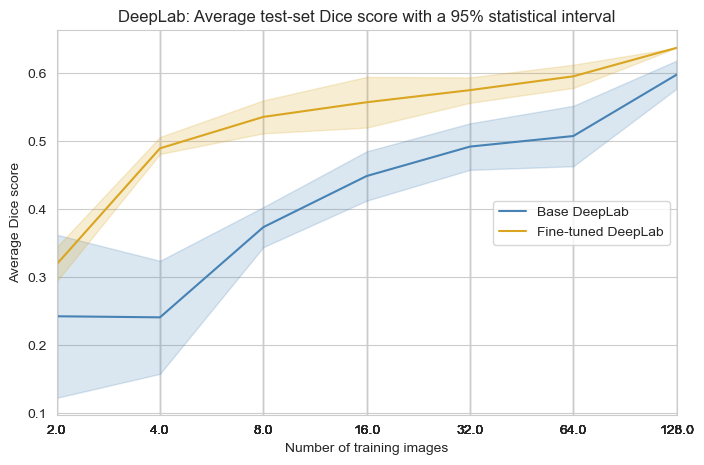

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ms = 8.5  # markersize

# Filter for 'model type' == 'base'
sns.lineplot(data=df[(df['model'] == 'deeplab') & (df['model_type'] == 'base')],
             x='n_samples', y='avg_dice', ms=ms, linestyle='-', label='Base DeepLab', color='steelblue')

# # Add confidence interval (fill_between for the area)
# plt.fill_between(df[(df['model'] == 'deeplab') & (df['model_type'] == 'base')]['n_samples'],
#                  df[(df['model'] == 'deeplab') & (df['model_type'] == 'base')]['lower95'],
#                  df[(df['model'] == 'deeplab') & (df['model_type'] == 'base')]['upper95'],
#                  color='steelblue', alpha=0.2)  # adjust alpha for transparency

# Filter for 'model type' == 'ft'
sns.lineplot(data=df[(df['model'] == 'deeplab') & (df['model_type'] == 'ft')],
             x='n_samples', y='avg_dice', ms=ms, linestyle='-', label='Fine-tuned DeepLab', color='goldenrod')

# # Add confidence interval (fill_between for the area)
# plt.fill_between(df[(df['model'] == 'deeplab') & (df['model_type'] == 'ft')]['n_samples'],
#                  df[(df['model'] == 'deeplab') & (df['model_type'] == 'ft')]['lower95'],
#                  df[(df['model'] == 'deeplab') & (df['model_type'] == 'ft')]['upper95'],
#                  color='goldenrod', alpha=0.2)  # adjust alpha for transparency

# Set x-axis to log scale
plt.xscale('log')

# Set custom x-ticks
xticks = df['n_samples']
plt.xticks(xticks, labels=xticks)  # Display numbers on x-axis
plt.xlim(2, 128)

# Label axes and title
plt.xlabel('Number of training images')
plt.ylabel('Average Dice score')
plt.title('DeepLab: Average test-set Dice score with a 95% statistical interval')

plt.legend(loc='center right')
# Save the plot to file
# plt.savefig('latex/figures/plot2_test_with_interval.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


In [247]:
# df.loc[22,'avg_dice'] = 0.5873
# df.loc[46,'avg_dice'] = 0.6345
df[df['model']=='samlora']

,model,n_samples,avg_dice,lower95,upper95,model_type,dice_sample_0,dice_sample_1,dice_sample_2,dice_sample_3,...,dice_sample_20,dice_sample_21,dice_sample_22,dice_sample_23,dice_sample_24,dice_sample_25,dice_sample_26,dice_sample_27,dice_sample_28,dice_sample_29
2,samlora,2.0,0.367100,0.078027,0.816424,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,samlora,2.0,0.461761,0.000000,0.863011,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,samlora,4.0,0.541382,0.071071,0.829721,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,samlora,4.0,0.508843,0.016437,0.836592,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,samlora,8.0,0.591801,0.141568,0.875239,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,samlora,8.0,0.492000,0.010115,0.866224,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,samlora,16.0,0.561320,0.074138,0.767349,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,samlora,16.0,0.523580,0.159584,0.832124,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,samlora,32.0,0.515120,0.168331,0.843108,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,samlora,32.0,0.582116,0.287212,0.847270,base,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df.loc[7,'avg_dice'] = 0.4725

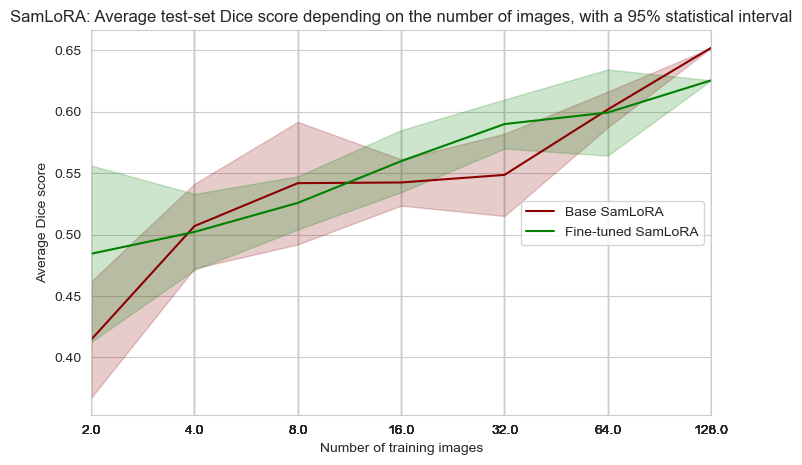

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ms = 8.5  # markersize

# Filter for 'model type' == 'base'
sns.lineplot(data=df[(df['model'] == 'samlora') & (df['model_type'] == 'base')],
             x='n_samples', y='avg_dice', ms=ms, linestyle='-', label='Base SamLoRA', color='darkred')

# # Add confidence interval (fill_between for the area)
# plt.fill_between(df[(df['model'] == 'samlora') & (df['model_type'] == 'base')]['n_samples'],
#                  df[(df['model'] == 'samlora') & (df['model_type'] == 'base')]['lower95'],
#                  df[(df['model'] == 'samlora') & (df['model_type'] == 'base')]['upper95'],
#                  color='darkred', alpha=0.2)  # adjust alpha for transparency

# Filter for 'model type' == 'ft'
sns.lineplot(data=df[(df['model'] == 'samlora') & (df['model_type'] == 'ft')],
             x='n_samples', y='avg_dice', ms=ms, linestyle='-', label='Fine-tuned SamLoRA', color='green')

# # Add confidence interval (fill_between for the area)
# plt.fill_between(df[(df['model'] == 'samlora') & (df['model_type'] == 'ft')]['n_samples'],
#                  df[(df['model'] == 'samlora') & (df['model_type'] == 'ft')]['lower95'],
#                  df[(df['model'] == 'deeplab') & (df['model_type'] == 'ft')]['upper95'],
#                  color='green', alpha=0.2)  # adjust alpha for transparency

# Set x-axis to log scale
plt.xscale('log')

# Set custom x-ticks
xticks = df['n_samples']
plt.xticks(xticks, labels=xticks)  # Display numbers on x-axis
plt.xlim(2, 128)

# Label axes and title
plt.xlabel('Number of training images')
plt.ylabel('Average Dice score')
plt.title('SamLoRA: Average test-set Dice score depending on the number of images, with a 95% statistical interval')

plt.legend(loc='center right')

# Save the plot to file
# plt.savefig('latex/figures/plot2_test_with_interval.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


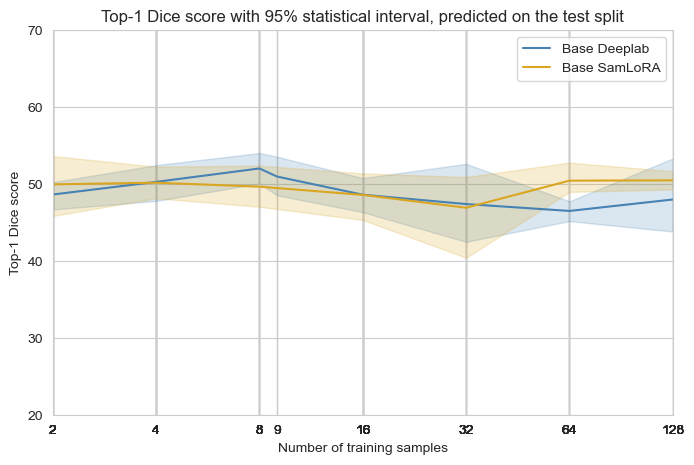

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
        
ms = 8.5 # markersize

sns.lineplot(data = df[df['model']=='deeplab'], x='n_samples', y='avg_dice', ms=ms, linestyle='-', label='Base Deeplab', color='steelblue')
sns.lineplot(data = df[df['model']=='samlora'], x='n_samples', y='avg_dice', ms=ms, linestyle='-', label='Base SamLoRA', color='goldenrod')

plt.xscale('log')
xticks = df['n_samples']
plt.xticks(xticks, labels=xticks)  # dipslay numbers on x-axis
plt.ylim(20, 70)
plt.xlim(2,128)

plt.xlabel('Number of training samples')
plt.ylabel('Top-1 Dice score')
plt.title('Top-1 Dice score with 95% statistical interval, predicted on the test split')

plt.savefig('latex/figures/plot2_test.png',bbox_inches='tight',dpi=300)
plt.show()

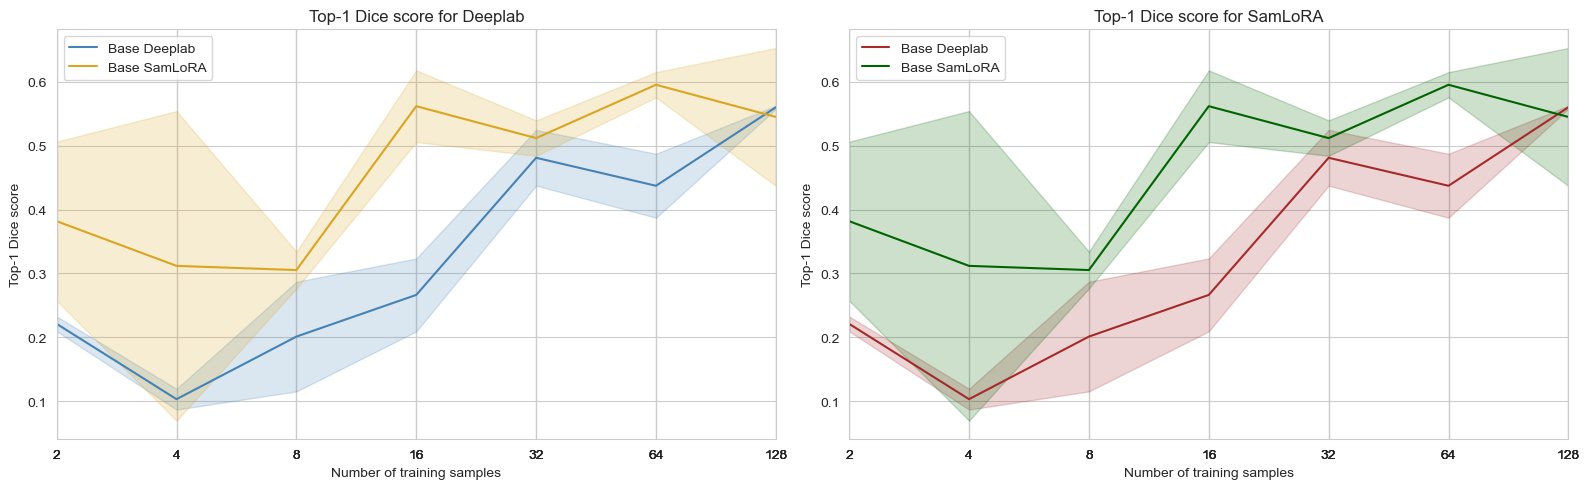

In [ ]:
# Create two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # 1 row, 2 columns

# Set the style for seaborn
sns.set_style("whitegrid")

# Markersize
ms = 8.5

# First plot on the left axis
sns.lineplot(data=df[df['model']=='deeplab'], x='n_samples', y='avg_dice', ms=ms, linestyle='-', label='Base Deeplab', color='steelblue', ax=axes[0])
sns.lineplot(data=df[df['model']=='samlora'], x='n_samples', y='avg_dice', ms=ms, linestyle='-', label='Base SamLoRA', color='goldenrod', ax=axes[0])

axes[0].set_xscale('log')
xticks = df['n_samples']
axes[0].set_xticks(xticks)
axes[0].set_xticklabels(xticks)  # display numbers on x-axis
axes[0].set_xlim(2, 128)

axes[0].set_xlabel('Number of training samples')
axes[0].set_ylabel('Top-1 Dice score')
axes[0].set_title('Top-1 Dice score for Deeplab')

# Second plot on the right axis (you can customize it as you need)
sns.lineplot(data=df[df['model']=='deeplab'], x='n_samples', y='avg_dice', ms=ms, linestyle='-', label='Base Deeplab', color='brown', ax=axes[1])
sns.lineplot(data=df[df['model']=='samlora'], x='n_samples', y='avg_dice', ms=ms, linestyle='-', label='Base SamLoRA', color='darkgreen', ax=axes[1])

axes[1].set_xscale('log')
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xticks)
axes[1].set_xlim(2, 128)

axes[1].set_xlabel('Number of training samples')
axes[1].set_ylabel('Top-1 Dice score')
axes[1].set_title('Top-1 Dice score for SamLoRA')

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure
# plt.savefig('latex/figures/plot_double_test.png',bbox_inches='tight', dpi=300)

# Show the plots
plt.show()


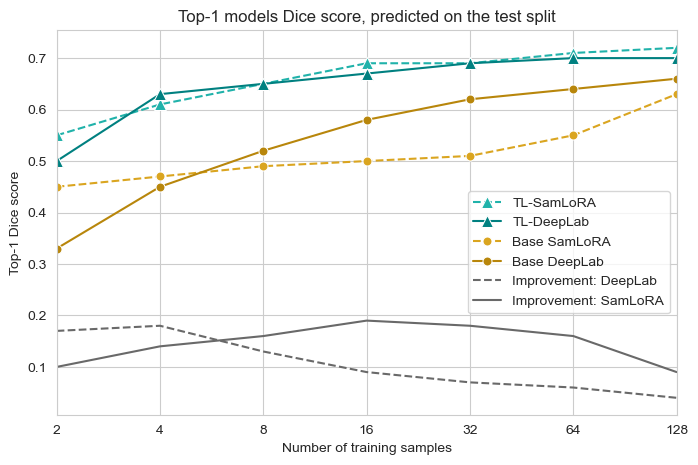

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

ms = 8.5 # markersize

# seaborn lineplot
sns.lineplot(x=df['n_samples'], y=df['Dice TL-SamLoRA'], marker='^', ms=ms, linestyle='--', label='TL-SamLoRA', color='lightseagreen')
sns.lineplot(x=df['n_samples'], y=df['Dice TL-DeepLab'], marker='^', ms=ms, linestyle='-', label='TL-DeepLab', color='teal')
sns.lineplot(x=df['n_samples'], y=df['Dice base SamLoRA'], marker='o', ms=ms-2, linestyle='--', label='Base SamLoRA', color='goldenrod')
sns.lineplot(x=df['n_samples'], y=df['Dice base DeepLab'], marker='o', ms=ms-2, linestyle='-', label='Base DeepLab', color='darkgoldenrod')

# calculate change between base and tl models
df['deeplab_change'] = df['Dice TL-DeepLab'] - df['Dice base DeepLab']
df['samlora_change'] = df['Dice TL-SamLoRA'] - df['Dice base SamLoRA']

# plt.fill_between(df['n_samples'], df['Dice base DeepLab'], df['Dice TL-DeepLab'], alpha=0.2, color='slategrey')
# plt.fill_between(df['n_samples'], df['Dice base SamLoRA'], df['Dice TL-SamLoRA'], alpha=0.2, color='slategrey')

# plot the increase
sns.lineplot(x=df['n_samples'], y=df['deeplab_change'], linestyle='--', color='dimgrey', label='Improvement: DeepLab')
sns.lineplot(x=df['n_samples'], y=df['samlora_change'], linestyle='-', color='dimgrey', label='Improvement: SamLoRA')

# log scale x-axis
plt.xscale('log')
xticks = df['n_samples']
plt.xticks(xticks, labels=xticks)  # dipslay numbers on x-axis
plt.xlim(2,128)

plt.xlabel('Number of training samples')
plt.ylabel('Top-1 Dice score')
plt.title('Top-1 models Dice score, predicted on the test split')

plt.legend(bbox_to_anchor=(1, 0.6))

plt.show()
plt.savefig('latex/figures/plot2_test.png',bbox_inches='tight',dpi=300)


## Figure 3

sample_10
sample_102
sample_107


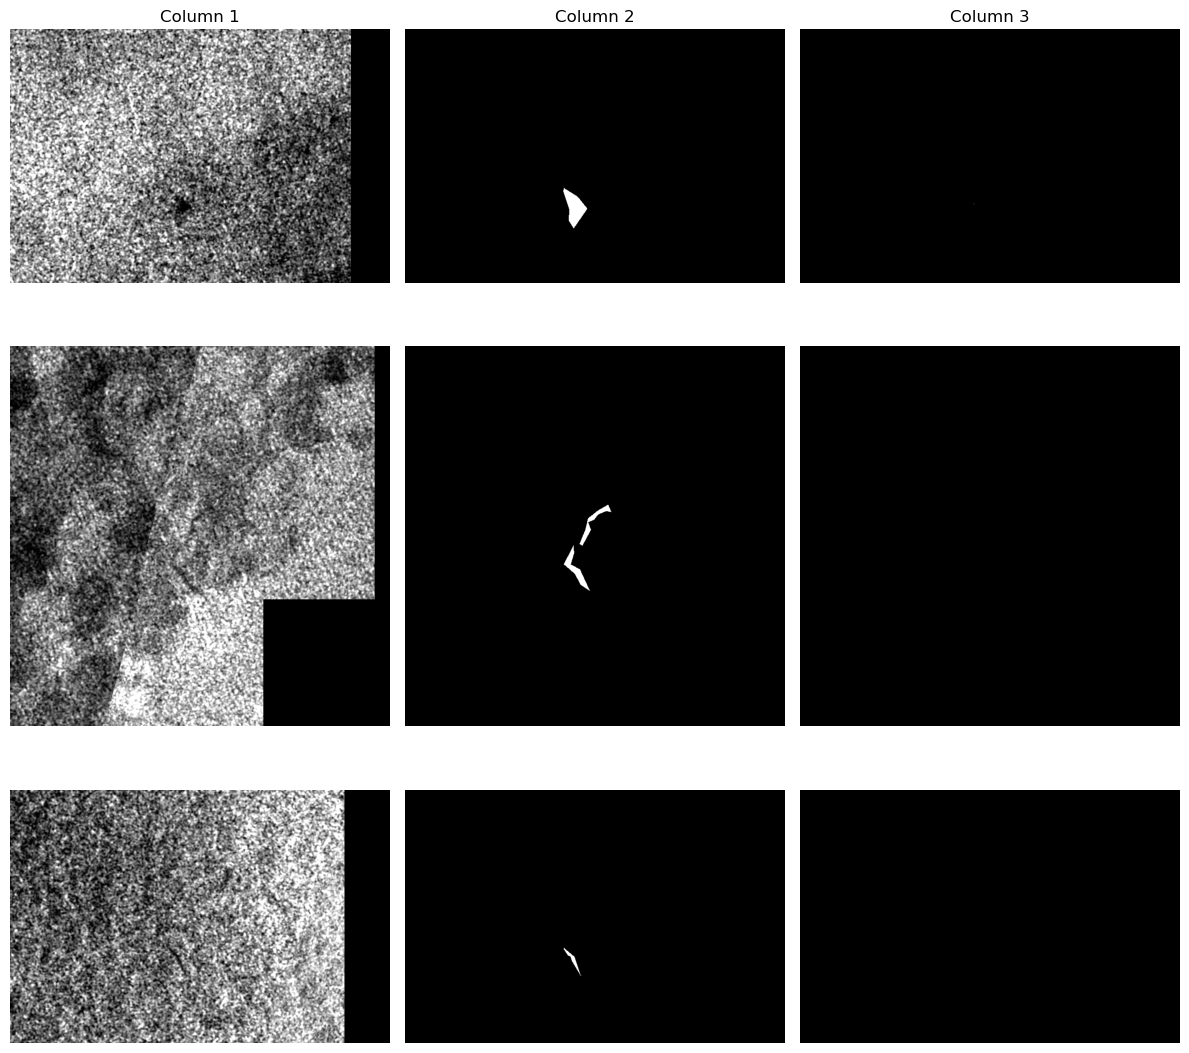

In [208]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

pixelsize = 25
tilesize = 512

# Assuming the images are stored in a directory 'images/'
images_path = []
i = 0
for sample in os.listdir(f'data/pred/pred_{tilesize}_{pixelsize}'):
    i += 1
    if i <=0:
        continue
    print(sample)
    for name in ['raw_mosaic','labels_mosaic','pred']:
        if name == 'labels_mosaic':
            tif_path = f'data/pred/pred_{tilesize}_{pixelsize}/{sample}/{name}.png'
        else:  
            tif_path = f'data/pred/pred_{tilesize}_{pixelsize}/{sample}/{name}.tif'
        images_path.append(tif_path)
        if len(images_path)==9:
            break
    if len(images_path)==9:
        break

images = [mpimg.imread(img_path) for img_path in images_path]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Loop through the axes and images to display them
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Show image in grayscale or change cmap if needed
    ax.axis('off')  # Hide axis to focus on the image
    # Optionally add labels for rows and columns
    if i % 3 == 0:  # Leftmost column
        ax.set_ylabel(f'Row {i//3 + 1}', fontsize=12)
    if i // 3 == 0:  # Top row
        ax.set_title(f'Column {i%3 + 1}', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# plt.savefig('latex/figures/preds.png',dpi=300)

# Show the plot
plt.show()


In [95]:
dice_values = np.random.rand(12)
dice_values

array([0.115093, 0.687854, 0.495861, 0.027587, 0.478632, 0.600933, 0.288298, 0.197659, 0.445205, 0.564064, 0.475935,
       0.477955])

sample_120
sample_123
sample_130


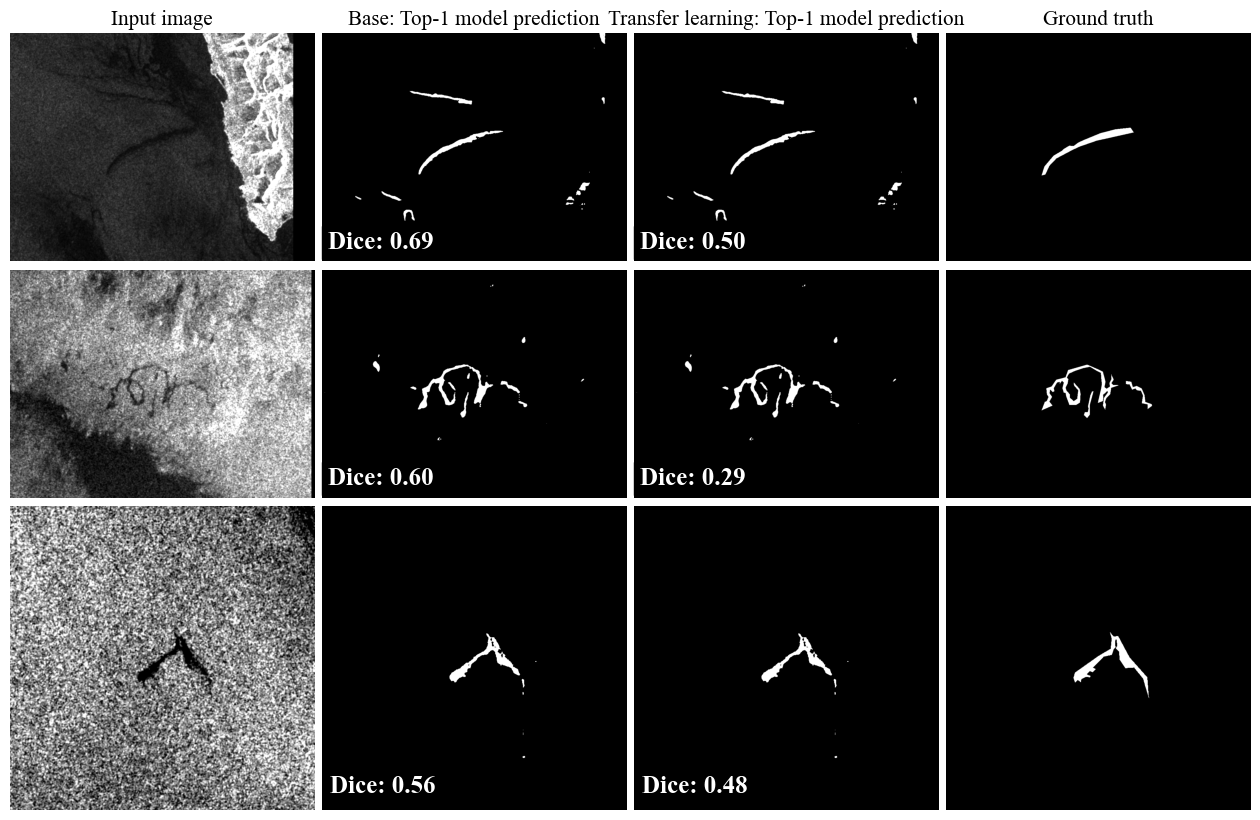

In [125]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import matplotlib.gridspec as gridspec

plt.rcParams['font.family'] = 'serif'  # Set the font family
plt.rcParams['font.serif'] = ['Times New Roman']

pixelsize = 25
tilesize = 512

columns_fig = ['Input image', 'Base: Top-1 model prediction','Transfer learning: Top-1 model prediction', 'Ground truth']

images_path = []
i = 0
for sample in os.listdir(f'data/pred/pred_{tilesize}_{pixelsize}'):
    i += 1
    if i <= 6:
        continue
    print(sample)
    for name in ['raw_mosaic','pred','pred','labels_mosaic']:
        if name == 'labels_mosaic':
            tif_path = f'data/pred/pred_{tilesize}_{pixelsize}/{sample}/{name}.png'
        else:
            tif_path = f'data/pred/pred_{tilesize}_{pixelsize}/{sample}/{name}.tif'
        images_path.append(tif_path)
        if len(images_path) == 12:  # Adjusted for 3x4 grid
            break
    if len(images_path) == 12:
        break

images = [mpimg.imread(img_path) for img_path in images_path]

# Create a figure with GridSpec WITHOUT an extra empty row
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(3, 4, height_ratios=[0.7, 0.85, 0.84])  # Equal heights, controlled via hspace

# Loop through the images and assign them to subplots
axes = []
image_index = 0
for i in range(3):  # 3 rows (0, 1, 2)
    for j in range(4):  # 4 columns
        ax = plt.subplot(gs[i, j])
        ax.imshow(images[image_index], cmap='gray')  # Display image
        ax.axis('off')  # Hide axis
        axes.append(ax)

        if j in [1, 2]:  # Only for 2nd and 3rd columns
            ax.text(
                20,  # X position (pixels)
                images[image_index].shape[0] - 44,  # Y position (bottom of image)
                f'Dice: {dice_values[image_index]:.2f}',  # Text content
                color='white',  # White text
                fontsize=18,
                fontweight='bold',
                bbox=dict(facecolor='black', alpha=1,
                        #    edgecolor='white', linewidth=2
                        )  # Black background
            )

        image_index += 1
# Optionally add labels for rows and columns
for i in range(3):  # Row labels
    axes[i * 4].set_ylabel(f'Row {i+1}', fontsize=16)

for j in range(4):  # Column labels
    axes[j].set_title(f'{columns_fig[j]}', fontsize=15.2)

# Adjust general spacing - reduce all row spacing except between row 2 & 3
plt.subplots_adjust(hspace=-.42, wspace=0.025)  # Control row spacing globally

plt.savefig('latex/figures/preds4x3.png',bbox_inches='tight',dpi=300)

# Show the plot
plt.show()


# Table

In [213]:
df_dice_native_res = pd.read_csv('data/model_results/native_format_dice.csv')
print(df_dice_native_res['avg_dice'].mean())
df_dice_native_res

0.5520729568223699


,Unnamed: 0,model,n_samples,avg_dice,type,tile_sizes,pixel_sizes,fullnames,dice_sample_0,dice_sample_1,...,dice_sample_20,dice_sample_21,dice_sample_22,dice_sample_23,dice_sample_24,dice_sample_25,dice_sample_26,dice_sample_27,dice_sample_28,dice_sample_29
0,0,deeplab,128,0.607339,fine-tuned,256,25,BASE_deeplab_256_25_n128_RESNET101,0.020213,0.402794,...,0.518519,0.746518,0.719298,0.834085,0.783903,0.426343,0.352593,0.649900,0.309087,0.521634
1,1,deeplab,128,0.559615,fine-tuned,256,25,BASE_deeplab_256_25_n128_RESNET50,0.482085,0.000000,...,0.536521,0.821956,0.000000,0.832247,0.757587,0.182336,0.197829,0.691285,0.192516,0.525998
2,2,deeplab,128,0.508596,fine-tuned,512,25,BASE_deeplab_512_25_n128_RESNET101,0.000000,0.000000,...,0.511734,0.763432,0.000000,0.847591,0.733390,0.169980,0.060890,0.620464,0.000000,0.011325
3,3,deeplab,128,0.532742,fine-tuned,512,25,BASE_deeplab_512_25_n128_RESNET50,0.001074,0.000000,...,0.531732,0.796634,0.785276,0.849764,0.734779,0.047178,0.245623,0.657469,0.000000,0.000000


In [227]:
# %Code from Burkov 2020
def get_interval(values,confidence_level=95): # by default, for 95%
    lower = np.percentile(values, (100.0-confidence_level)/2.0)
    upper = np.percentile(values, confidence_level+((100.0-confidence_level)/2.0))
    return (lower, upper)

In [278]:
df_tl = pd.read_csv('data/model_results/tl_dice.csv')
df_base = pd.read_csv('data/model_results/base_dice.csv')

dict_dice = {
    'tile_size' : [],
    'pixel_size' : [],
    'lower_change' : [],
    'upper_change' : [],
    'plusminus_change': [],
    'change': [],
    'avg_base': [],
    'avg_tl': []
    # 'up': [],
    # 'down': []
}

pixel_sizes = [10,25]
tile_sizes = [256,512]

for ts in tile_sizes:
    for ps in pixel_sizes:
        list_change = []
        list_dice_base = []
        list_dice_tl = []
        for n in [2,8,32,128]:
            df = df_tl[(df_tl['pixel_sizes']==ps)&(df_tl['tile_sizes']==ts)&(df_tl['n_samples']==n)]
            df2 = df_base[(df_tl['pixel_sizes']==ps)&(df_base['tile_sizes']==ts)&(df_base['n_samples']==n)]
            avg_tl = sum(df['avg_dice']) / len(df['avg_dice'])
            avg_base = sum(df2['avg_dice'] / len(df2['avg_dice']))
            change = avg_tl - avg_base
            list_change.append(change)
            list_dice_base.append(avg_base)
            list_dice_tl.append(avg_tl)
            # for model in ['deeplab','samlora']:
                # df = df_tl[(df_tl['pixel_sizes']==ps)&(df_tl['tile_sizes']==ts)&(df_tl['n_samples']==n)&(df_tl['model']==model)]
                # df2 = df_base[(df_tl['pixel_sizes']==ps)&(df_base['tile_sizes']==ts)&(df_base['n_samples']==n)&(df_base['model']==model)]
                # avg_tl = sum(df['avg_dice']) / len(df['avg_dice'])
                # avg_base = sum(df2['avg_dice'] / len(df2['avg_dice']))
                # change = avg_tl - avg_base
                # list_change.append(change)
        avg_base = sum(list_dice_base) / len(list_dice_base)
        avg_tl = sum(list_dice_tl) / len(list_dice_tl)
        dict_dice['avg_base'].append(avg_base)
        dict_dice['avg_tl'].append(avg_tl)
        lower, upper = get_interval(list_change)
        dict_dice['tile_size'].append(ts)
        dict_dice['pixel_size'].append(ps)
        dict_dice['lower_change'].append(lower)
        dict_dice['upper_change'].append(upper)
        avg_diff = upper-lower
        dict_dice['plusminus_change'].append(avg_diff)
        change_value = (upper+lower)/2
        dict_dice['change'].append(change_value)

df = pd.DataFrame(dict_dice)
# df['change'] = df['change'] * 100 - 100
# df['plusminus_change'] = df['plusminus_change']*100
df['avg_dice'] = (df['avg_base'] + df['avg_tl']) / 2
df

,tile_size,pixel_size,lower_change,upper_change,plusminus_change,change,avg_base,avg_tl,avg_dice
0,256,10,0.030856,0.067298,0.036442,0.049077,0.524194,0.574864,0.549529
1,256,25,0.062680,0.197242,0.134562,0.129961,0.430523,0.542250,0.486387
2,512,10,0.005982,0.056496,0.050514,0.031239,0.489738,0.522208,0.505973
3,512,25,-0.028506,0.253545,0.282051,0.112520,0.372179,0.459677,0.415928


In [216]:
native = df_dice_native_res['avg_dice']
native

0    0.607339
1    0.559615
2    0.508596
3    0.532742
Name: avg_dice, dtype: float64

,dices_256_10,dices_256_25,dices_512_10,dices_512_25
0,0.666556,NaN,NaN,NaN
1,0.648974,NaN,NaN,NaN
8,NaN,0.611587,NaN,NaN
9,NaN,0.621474,NaN,NaN
16,NaN,NaN,0.615418,NaN
17,NaN,NaN,0.605925,NaN
24,NaN,NaN,NaN,0.539687
25,NaN,NaN,NaN,0.417854


# end